In [56]:
import urllib.request as urllib2
import json
import csv


data = []
for i in range (1,13):
    print(i)
    for j in range(1,32):
        if(i>=10):
            url = "https://bank.gov.ua/NBUStatService/v1/statdirectory/exchange?date=2021"+str(i)+str(j)+"&json"
        else:
            url = "https://bank.gov.ua/NBUStatService/v1/statdirectory/exchange?date=20210"+str(i)+str(j)+"&json"
        d = urllib2.urlopen(url).read()
        data.append(json.loads(d))



1
2
3
4
5
6
7
8
9
10
11
12


In [20]:
data[0]

[{'r030': 36,
  'txt': 'Австралійський долар',
  'rate': 21.6852,
  'cc': 'AUD',
  'exchangedate': '01.01.2021'},
 {'r030': 124,
  'txt': 'Канадський долар',
  'rate': 22.1154,
  'cc': 'CAD',
  'exchangedate': '01.01.2021'},
 {'r030': 156,
  'txt': 'Юань Женьміньбі',
  'rate': 4.3333,
  'cc': 'CNY',
  'exchangedate': '01.01.2021'},
 {'r030': 191,
  'txt': 'Куна',
  'rate': 4.6037,
  'cc': 'HRK',
  'exchangedate': '01.01.2021'},
 {'r030': 203,
  'txt': 'Чеська крона',
  'rate': 1.3238,
  'cc': 'CZK',
  'exchangedate': '01.01.2021'},
 {'r030': 208,
  'txt': 'Данська крона',
  'rate': 4.67,
  'cc': 'DKK',
  'exchangedate': '01.01.2021'},
 {'r030': 344,
  'txt': 'Гонконгівський долар',
  'rate': 3.6472,
  'cc': 'HKD',
  'exchangedate': '01.01.2021'},
 {'r030': 348,
  'txt': 'Форинт',
  'rate': 0.095181,
  'cc': 'HUF',
  'exchangedate': '01.01.2021'},
 {'r030': 356,
  'txt': 'Індійська рупія',
  'rate': 0.3857,
  'cc': 'INR',
  'exchangedate': '01.01.2021'},
 {'r030': 360,
  'txt': 'Рупія',

In [3]:
!pip3 install urllib2

Defaulting to user installation because normal site-packages is not writeable
ERROR: Could not find a version that satisfies the requirement urllib2 (from versions: none)
ERROR: No matching distribution found for urllib2


In [57]:
fulldata = []
for d in data:
    for i in d:
        fulldata.append(i)

In [27]:
def save_as_csv(data,name):
    count = 0
    fname = name
    with open(fname,'w') as outf:
        outcsv = csv.writer(outf)
        for d in data:
            if count == 0:
                header = d.keys()
                outcsv.writerow(header)
                count += 1
            outcsv.writerow(d.values())

In [59]:
save_as_csv(fulldata,'mydata.csv')

In [47]:
!sudo yum install boto3

Loaded plugins: extras_suggestions, langpacks, priorities, update-motd
amzn2-core                                               | 3.7 kB     00:00     
amzn2extra-docker                                        | 3.0 kB     00:00     
amzn2extra-kernel-5.10                                   | 3.0 kB     00:00     
No package boto3 available.
Error: Nothing to do


In [60]:
import logging
import boto3
from botocore.exceptions import ClientError
import os


def upload_file(file_name, bucket, object_name=None):

    # If S3 object_name was not specified, use file_name
    if object_name is None:
        object_name = os.path.basename(file_name)

    # Upload the file
    s3_client = boto3.client('s3')
    try:
        response = s3_client.upload_file(file_name, bucket, object_name)
    except ClientError as e:
        logging.error(e)
        return False
    return True

In [55]:
!pip install boto3 

DEPRECATION: Python 2.7 reached the end of its life on January 1st, 2020. Please upgrade your Python as Python 2.7 is no longer maintained. pip 21.0 will drop support for Python 2.7 in January 2021. More details about Python 2 support in pip can be found at https://pip.pypa.io/en/latest/development/release-process/#python-2-support
Defaulting to user installation because normal site-packages is not writeable


In [61]:
s3 = boto3.client('s3')
with open("mydata.csv", "rb") as f:
    s3.upload_fileobj(f, "sofffbucket", "kurs.csv")

In [62]:
with open('kurs.csv', 'wb') as f:
    s3.download_fileobj('sofffbucket', 'kurs.csv', f)

In [3]:
import pandas as pd
df = pd.read_csv('kurs.csv')

In [4]:
df.head()

,r030,txt,rate,cc,exchangedate
0,36,Австралійський долар,21.6852,AUD,01.01.2021
1,124,Канадський долар,22.1154,CAD,01.01.2021
2,156,Юань Женьміньбі,4.3333,CNY,01.01.2021
3,191,Куна,4.6037,HRK,01.01.2021
4,203,Чеська крона,1.3238,CZK,01.01.2021


In [141]:
df['exchangedate'] =  pd.to_datetime(df.exchangedate)

In [143]:
EUR = df.where(df['cc']=='EUR').sort_values(by = 'exchangedate').dropna()
USD = df.where(df['cc']=='USD').sort_values(by = 'exchangedate').dropna()

In [186]:
EUR[['exchangedate','rate']].where(EUR['exchangedate'].dt.day==28).dropna()

,exchangedate,rate
1680,2021-01-28,34.1207
3571,2021-02-28,34.1459
5282,2021-03-28,33.0337
7145,2021-04-28,33.5577
8946,2021-05-28,33.5693
10806,2021-06-28,32.7928
12607,2021-07-28,31.7814
14467,2021-08-28,31.6645
16327,2021-09-28,31.1764
18128,2021-10-28,30.6447


#!pip3 install matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker

fig = plt.figure()

fig, ax = plt.subplots()

ax.plot(EUR['exchangedate'].where(EUR['exchangedate'].dt.day==1).dt.month,  EUR['rate'].where(EUR['exchangedate'].dt.day==1), label = 'EUR')
ax.plot(USD['exchangedate'].where(USD['exchangedate'].dt.day==1).dt.month,USD['rate'].where(USD['exchangedate'].dt.day==1),label = 'USD')
fig.set_figheight(5)
fig.set_figwidth(10)
ax.set_xlabel('month')
ax.set_ylabel('rate')
ax.legend()
loc = plticker.MultipleLocator(base=1.0) # this locator puts ticks at regular intervals
ax.xaxis.set_major_locator(loc)
ax.yaxis.set_major_locator(plticker.MultipleLocator(base=0.5))
plt.show()

<Figure size 1224x360 with 0 Axes>

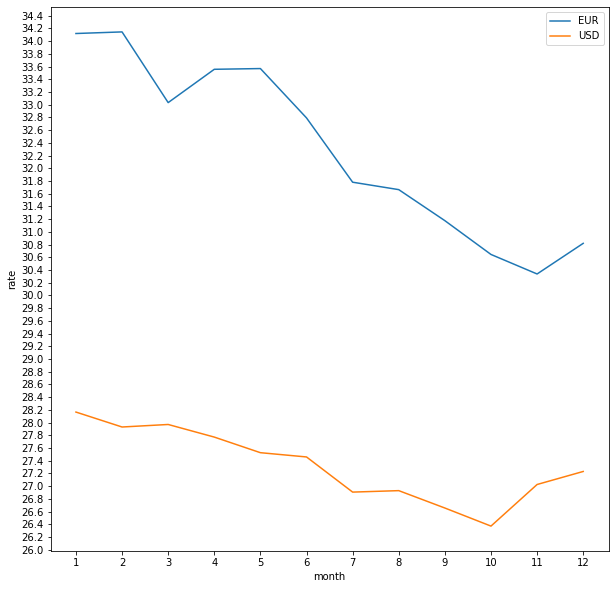

<Figure size 1224x360 with 0 Axes>

In [180]:
fig = plt.figure()
fig, ax = plt.subplots()
ax.plot(EUR['exchangedate'].where(EUR['exchangedate'].dt.day==28).dropna().dt.month, EUR['rate'].where(EUR['exchangedate'].dt.day==28).dropna(), label = 'EUR') 
ax.plot(USD['exchangedate'].where(USD['exchangedate'].dt.day==28).dropna().dt.month,USD['rate'].where(USD['exchangedate'].dt.day==28).dropna(),label = 'USD') 
fig.set_figheight(10) 
fig.set_figwidth(10) 
ax.set_xlabel('month') 
ax.set_ylabel('rate') 
ax.legend() 
loc = plticker.MultipleLocator(base=1.0) 
# this locator puts ticks at regular intervals 
ax.xaxis.set_major_locator(loc) 
ax.yaxis.set_major_locator(plticker.MultipleLocator(base=0.2)) 
plt.show()
plt.savefig('per_months.png')

<Figure size 1224x360 with 0 Axes>

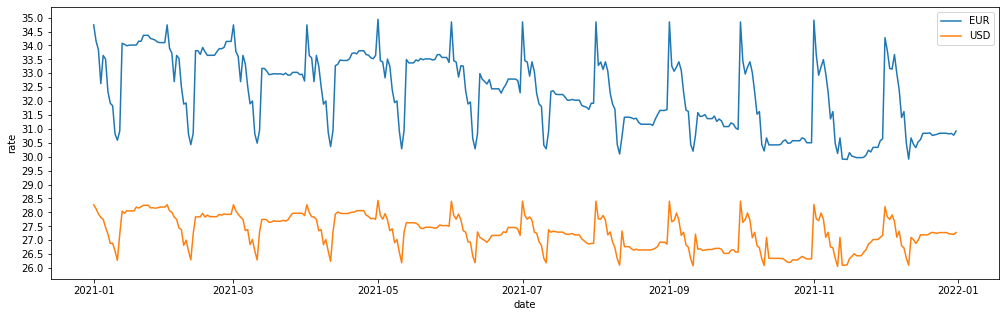

<Figure size 1224x360 with 0 Axes>

In [181]:
fig = plt.figure()

fig, ax = plt.subplots()

ax.plot(EUR['exchangedate'],  EUR['rate'], label = 'EUR')
ax.plot(USD['exchangedate'],USD['rate'],label = 'USD')

ax.set_xlabel('date')
ax.set_ylabel('rate')
ax.yaxis.set_major_locator(plticker.MultipleLocator(base=0.5)) 
ax.legend()
plt.show()
plt.savefig('during_year.png')

In [184]:
import boto3
s3 = boto3.client('s3')
with open("per_months.png", "rb") as f:
    s3.upload_fileobj(f, "sofffbucket", "per_months.png")
with open("during_year.png", "rb") as f:
    s3.upload_fileobj(f, "sofffbucket", "during_year.png")

In [137]:
EUR

,r030,txt,rate,cc,exchangedate
33,978,Євро,34.7396,EUR,2021-01-01
1924,978,Євро,34.1570,EUR,2021-01-02
3635,978,Євро,33.8449,EUR,2021-01-03
5525,978,Євро,32.6290,EUR,2021-01-04
7326,978,Євро,33.6427,EUR,2021-01-05
...,...,...,...,...,...
21729,978,Євро,30.8450,EUR,2021-12-27
21789,978,Євро,30.8196,EUR,2021-12-28
21849,978,Євро,30.8401,EUR,2021-12-29
21909,978,Євро,30.7760,EUR,2021-12-30
